In [ ]:
library(tidyverse)
library(lme4)
library(lmerTest)
library(MASS)
library(DHARMa)
library(ggplot2)
library(effectsize)
library(EMAtools)

In [10]:
data <- read.csv("D:/github/ad_ied/results/replay_ied_df_prop.csv")

data$basepath = factor(data$basepath)
data$label = factor(data$label, levels = c("Pre", "Post"))
data$label_binary = factor(data$label_binary)

summary(data)

     const        prop           n_replays       label   
 Min.   :1   Min.   :0.00000   Min.   :   2.0   Pre :12  
 1st Qu.:1   1st Qu.:0.00000   1st Qu.:  11.5   Post:12  
 Median :1   Median :0.02601   Median :  22.5            
 Mean   :1   Mean   :0.05559   Mean   : 215.3            
 3rd Qu.:1   3rd Qu.:0.09524   3rd Qu.: 301.2            
 Max.   :1   Max.   :0.19048   Max.   :1358.0            
                                                         
                                  basepath     label_binary
 X:\\AD_sessions\\AZ11\\AZ11_210422_sess7: 2   0:12        
 X:\\AD_sessions\\AZ11\\AZ11_210427_sess8: 2   1:12        
 X:\\AD_sessions\\AZ12\\AZ12_210317_sess2: 2               
 X:\\AD_sessions\\AZ12\\AZ12_210323_sess3: 2               
 X:\\AD_sessions\\AZ12\\AZ12_210325_sess4: 2               
 X:\\AD_sessions\\AZ12\\AZ12_210330_sess5: 2               
 (Other)                                 :12               

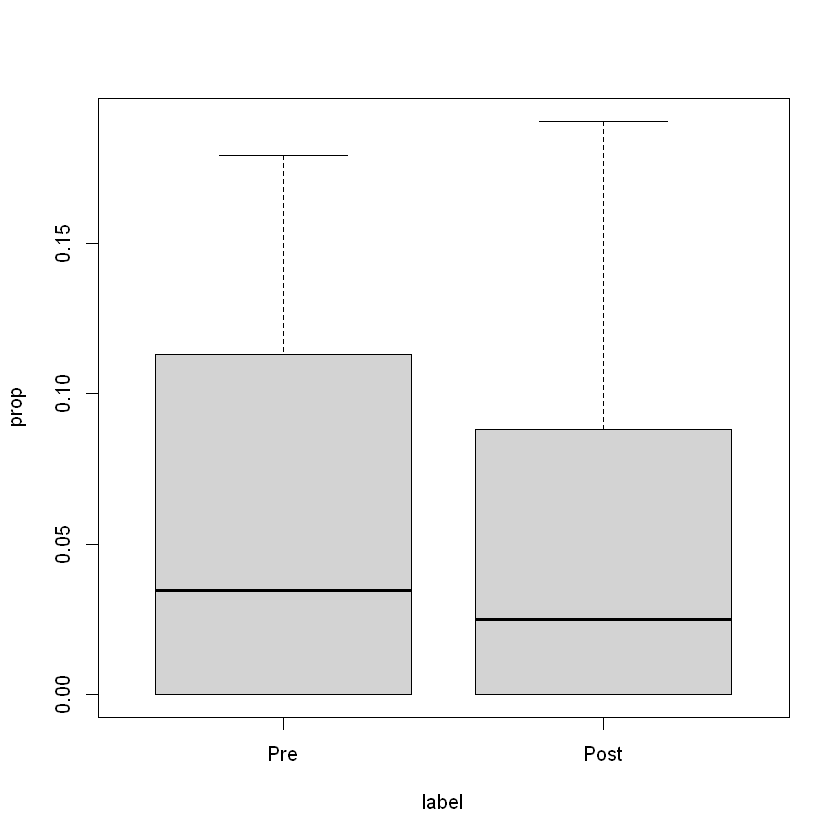

In [11]:
plot(prop ~ label, data = data)

adding (1|basepath) with glmer is essentially a paired test

In [18]:
m1 <- glmer(prop ~ label + (1 | basepath), weights = n_replays, data = data, family = "binomial")
summary(m1)
# a1 = anova(m1)
# F_to_eta2(a1$`F value`, a1$NumDF, a1$DenDF)
print("effect size:")
lme.dscore(m1, data = data, type = "lme4")
# m2 = glmer(prop ~ (1|basepath), weights=n_replays, data=data,family="binomial")


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop ~ label + (1 | basepath)
   Data: data
Weights: n_replays

     AIC      BIC   logLik deviance df.resid 
   106.1    109.6    -50.1    100.1       21 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2048 -0.6118 -0.3079  0.3209  1.9494 

Random effects:
 Groups   Name        Variance Std.Dev.
 basepath (Intercept) 0.6704   0.8188  
Number of obs: 24, groups:  basepath, 12

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.7245     0.3135  -8.690  < 2e-16 ***
labelPost    -0.4280     0.1000  -4.279 1.88e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
          (Intr)
labelPost -0.130

[1] "effect size:"


,t,df,d
,<dbl>,<dbl>,<dbl>
labelPost,-0.4515736,11,-0.2723091



	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
dispersion = 1.6784, p-value = 0.288
alternative hypothesis: two.sided


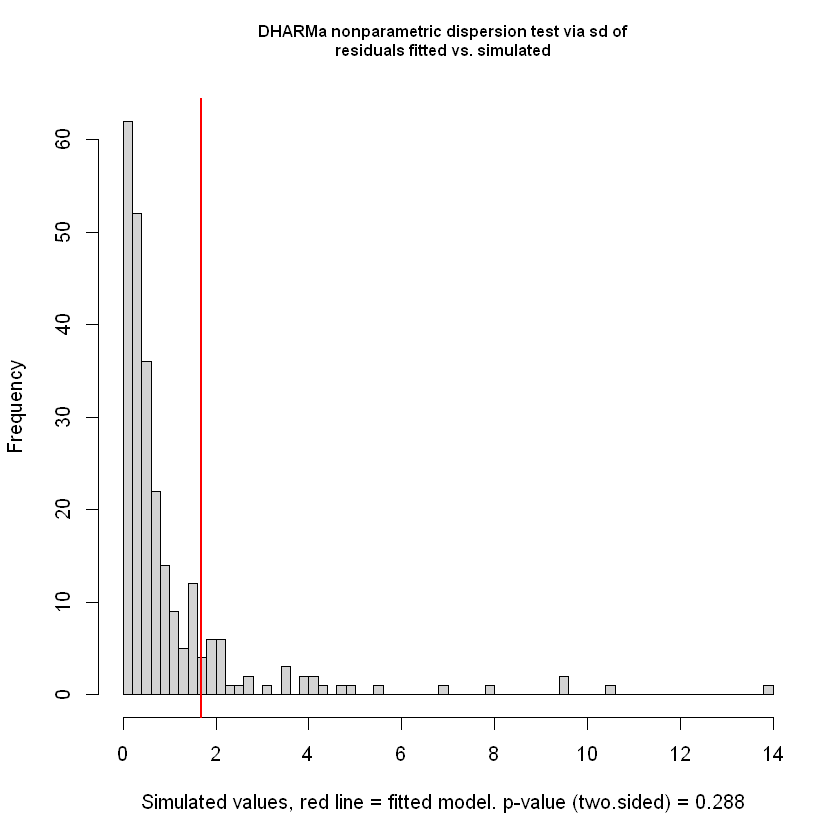

In [7]:
testDispersion(m1)

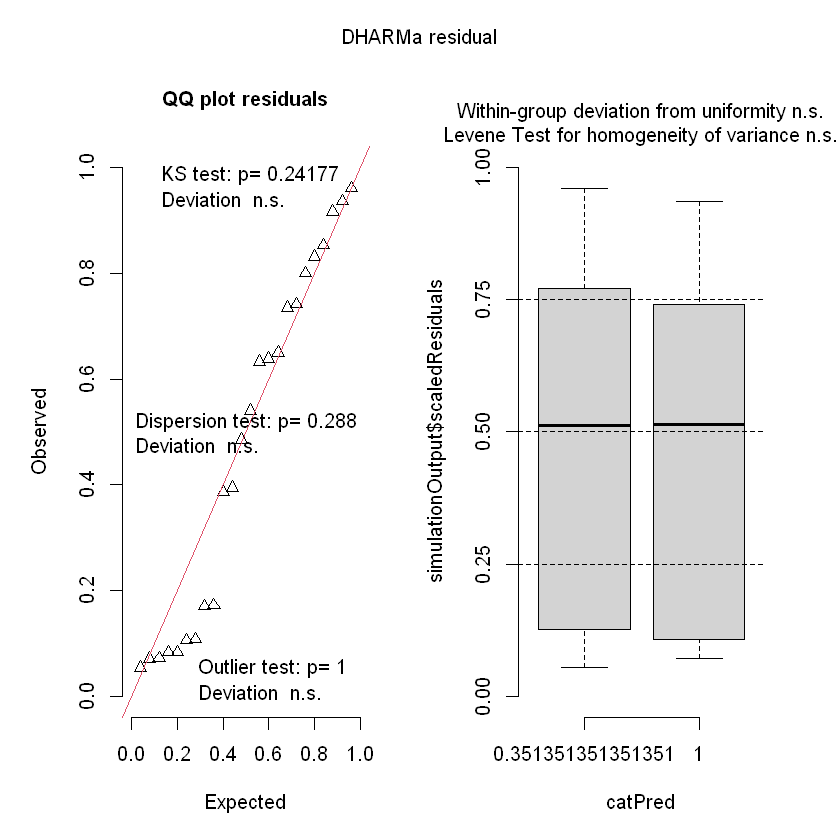

In [8]:
simulationOutput <- simulateResiduals(fittedModel = m1, plot = F)
plot(simulationOutput)